Should make a pandas dataframe where each run has a unique ID, and position is tracked for each interval

1. While loop faster than for loop
2. Is zero a possible value? Is one?
3. If it is at the boundary, how can I keep it from iterating? Continue works...

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.utils import resample

In [8]:
#Core function
x, y = 0,0
i = 1
df = pd.DataFrame(columns=['time','x','y'])
while i <= 10 :
    r = np.random.random_sample()
    if r < 0.25:
        y += 1 
        df.loc[i]=[i, x, y]
    if r > 0.25 and r < 0.5:
        y -= 1
        df.loc[i]=[i, x, y]
        #print x, y
    if r > 0.5 and r < 0.75:
        x += 1
        df.loc[i]=[i, x, y]
        #print x, y
    if r > 0.75:
        x -= 1
        df.loc[i]=[i, x, y]
        #print x, y
    print r
    i += 1
    

0.610793991072
0.858712606679
0.756074935055
0.609209863451
0.502290260203
0.305804335177
0.351816914735
0.014076213794
0.607481083268
0.522354132347


In [9]:
# This function returns a data frame of the distances after "t" draws

def randWalk(t):
    x, y = 0, 0
    i = 1
    df = pd.DataFrame(columns=['time','x','y'])
    while i <= t:
        r = np.random.random_sample()
        if r < 0.25:
            y += 1 
            df.loc[i]=[i, x, y]
        if r > 0.25 and r < 0.5:
            y -= 1
            df.loc[i]=[i, x, y]
            #print x, y
        if r > 0.5 and r < 0.75:
            x += 1
            df.loc[i]=[i, x, y]
            #print x, y
        if r > 0.75:
            x -= 1
            df.loc[i]=[i, x, y]
        i += 1
    return df

In [10]:
#randWalk(10)

In [11]:
# This function returns the fraction of times that distance >= 3 on the tenth move,
# over a certain number (numDraw) of random walks

def greaterThree(numDraws):
    j = 1
    countCrow3 = 0 
    while j <= numDraws: 
        m10 = randWalk(10).loc[10]
        dist = np.sqrt(np.square(m10['x']) + np.square(m10['y']))
        if dist >= 3:
            countCrow3 += 1
        j += 1
    return countCrow3/float(j)
greaterThree(100)


0.45544554455445546

In [12]:
#print greaterThree(10000)
#print greaterThree(10000)
#print greaterThree(10000)

In [13]:
distTen = pd.DataFrame(columns=['greaterTen'])
k = 0

while k < 10:
    n = greaterThree(5)
    distTen.loc[k] = n
    #print greaterTen(5)
    k += 1
distTen.head()

,greaterTen
0,0.166667
1,0.166667
2,0.333333
3,0.666667
4,0.333333


In [14]:
#Make this into a function
def distG3(rep,numDraws):
    distTen = pd.DataFrame(columns=['greaterTen'])
    k = 0
    while k < rep:
        n = greaterThree(numDraws)
        distTen.loc[k] = n
        k += 1
    return distTen

In [15]:
g3_50_10 = distG3(rep=50,numDraws=10)
#g3_50_1000 = distG3(rep=50,numDraws=50)

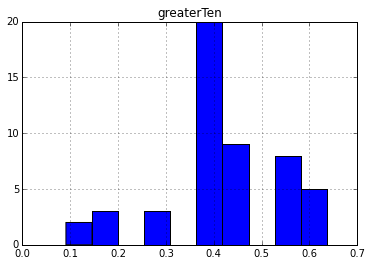

In [16]:
#g3_5050.hist()
g3_50_10.hist()
plt.show()

In [17]:
y = np.random.random_sample(20000)
len(y[y>0.9])

2054

In [18]:
np.random.random_sample()

0.41527431550266947

In [19]:
#This is the good stuff!

time = 100
xRand = np.random.randint(0, high = 2, size = time)
yRand = np.random.randint(0, high = 2, size = time)
print xRand
xSteps = np.where(xRand == 1, 1, -1)
ySteps = np.where(yRand == 1, 1, -1)
print xSteps
xPos = np.cumsum(xSteps)
yPos = np.cumsum(ySteps)
print xPos
print yPos

[0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0]
[-1 -1  1  1  1  1 -1  1 -1  1  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1
 -1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1  1 -1
 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1  1
 -1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1]
[ -1  -2  -1   0   1   2   1   2   1   2   3   2   3   2   1   2   3   2
   1   2   1   0  -1   0  -1  -2  -3  -4  -3  -4  -5  -4  -3  -4  -5  -4
  -5  -4  -3  -4  -5  -4  -5  -4  -5  -4  -3  -4  -3  -4  -5  -6  -7  -8
  -7  -8  -9  -8  -7  -8  -9  -8  -9 -10 -11 -10  -9 -10  -9 -10 -11 -12
 -13 -12 -11 -12 -13 -14 -15 -14 -15 -14 -15 -16 -15 -14 -15 -14 -13 -12
 -11 -12 -11 -12 -13 -12 -11 -10 -11 -12]
[ 1  2  1  2  1  0 -1 -2 -1 -2 -3 -4 -3 -4 -5 -4 -3 -4 -3 -4 -5 -6 -5 -4 -5
 -4 -5 -

In [20]:
time = 100
xRand = np.random.randint(0, high = 2, size = time)
yRand = np.random.randint(0, high = 2, size = time)
print xRand
xSteps = np.cumsum(np.where(xRand == 1, 1, -1))
ySteps = np.cumsum(np.where(yRand == 1, 1, -1))
print xSteps
xPos = np.cumsum(xSteps)
yPos = np.cumsum(ySteps)
print xPos
print yPos

[1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0
 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0]
[  1   0  -1  -2  -1   0   1   2   1   2   3   2   3   2   1   2   3   2
   1   0  -1   0  -1   0  -1  -2  -3  -2  -3  -4  -3  -4  -5  -6  -5  -6
  -7  -6  -5  -6  -5  -6  -5  -4  -5  -4  -5  -4  -5  -4  -5  -4  -5  -6
  -7  -8  -7  -8  -9  -8  -7  -8  -9 -10 -11 -12 -11 -10 -11 -10 -11 -10
 -11 -12 -11 -10 -11 -10  -9  -8  -9 -10  -9 -10  -9  -8  -9 -10 -11 -10
 -11 -12 -13 -12 -11 -10  -9 -10  -9 -10]
[   1    1    0   -2   -3   -3   -2    0    1    3    6    8   11   13   14
   16   19   21   22   22   21   21   20   20   19   17   14   12    9    5
    2   -2   -7  -13  -18  -24  -31  -37  -42  -48  -53  -59  -64  -68  -73
  -77  -82  -86  -91  -95 -100 -104 -109 -115 -122 -130 -137 -145 -154 -162
 -169 -177 -186 -196 -207 -219 -230 -240 -251 -261 -272 -282 -293 -305 -316
 -326 -33

In [21]:
def randWalk(time):
    xRand = np.random.randint(0, high = 2, size = time) #simulate binary outcome
    yRand = np.random.randint(0, high = 2, size = time)
    xPos = np.cumsum(np.where(xRand == 1, 1, -1))
    yPos = np.cumsum(np.where(yRand == 1, 1, -1))
    return xPos, yPos
a,b = randWalk(10)
print a
print b

[1 2 1 2 3 4 3 4 5 6]
[ 1  2  3  2  1  0 -1  0 -1  0]


In [22]:
np.random.rand(6,6)

array([[  1.28241527e-01,   1.89018049e-01,   8.35489167e-01,
          1.96120187e-01,   6.43703968e-02,   4.06336726e-01],
       [  2.19218527e-01,   2.80052885e-01,   9.95339386e-01,
          8.73513853e-01,   5.17374812e-01,   1.82030019e-01],
       [  1.55847661e-01,   8.27074932e-01,   5.80673082e-02,
          3.92835229e-01,   8.23279904e-01,   6.99699921e-01],
       [  2.30272180e-01,   4.30818810e-01,   9.31255357e-01,
          3.99171150e-01,   8.37453394e-01,   2.40088229e-01],
       [  5.06955015e-01,   9.88633458e-01,   8.70913310e-01,
          2.04126082e-01,   5.02636581e-01,   1.81659577e-01],
       [  8.03522854e-01,   5.31180157e-03,   7.94239718e-01,
          8.04257655e-01,   1.05885043e-05,   9.80349007e-01]])

In [23]:
# This function returns the fraction of times that distance >= 3 on the tenth move,
# over a certain number (numDraw) of random walks

# I think what I need to do here is to create a matrix. One dimension is the draws for the
# current walk. The second dimension is the draws for every subsequent walk.

def greaterThree(numDraws):
    j = 1
    countCrow3 = 0 
    while j <= numDraws: 
        x, y = randWalk(numDraws)
        x10, y10 = x[9], y[9]
        dist = np.sqrt(np.square(x10) + np.square(y10))
        if dist >= 3:
            countCrow3 += 1
        j += 1
    return countCrow3/float(j)
greaterThree(100)



0.49504950495049505

In [24]:
max = 0.5
while i < 10:
    x = max(np.random.rand(50))
    print x
    if x > max:
        x = max
    i += 1



In [25]:
m = np.matrix(np.random.randn(50).reshape((5,10)))
m = np.random.randn(50).reshape((5,10))
#len(np.random.randn(50))

In [26]:
s = np.array([[4,5,6,4,7],
 [7, 6, 4, 4, 7],
 [6, 7, 4, 5, 6]]).reshape((3,5))
print s
s2 = np.where(s<6,0,s)
print s2
s2[s2 == np.max(s2)] = -1
s2[s2 == np.max(s2)] = 1
s2
#np.where(s != 0 & s == 6,1,-1)
#?np.where

[[4 5 6 4 7]
 [7 6 4 4 7]
 [6 7 4 5 6]]
[[0 0 6 0 7]
 [7 6 0 0 7]
 [6 7 0 0 6]]


array([[ 0,  0,  1,  0, -1],
       [-1,  1,  0,  0, -1],
       [ 1, -1,  0,  0,  1]])

In [27]:
#This is most recent (1:45)

#np.random.randint(0, high = 4, size = 100)
def randWalk(moves,samples):
    draws = np.random.randint(4, high = 8, size = samples*moves).reshape((samples,moves))
    xSteps = np.where(draws<6,0,draws)
    xSteps[xSteps == np.max(xSteps)] = -1
    xSteps[xSteps == np.max(xSteps)] = 1
    
    ySteps = np.where(draws>5,0,draws)
    ySteps[ySteps == np.max(ySteps)] = -1
    ySteps[ySteps == np.max(ySteps)] = 1
    
    xPos = np.cumsum(xSteps, axis=1)
    yPos = np.cumsum(ySteps, axis=1)
    return xPos, yPos
    
randWalk(5,3)

(array([[ 1,  1,  2,  2,  2],
        [ 0,  1,  1,  1,  1],
        [-1,  0, -1, -1, -1]]), array([[ 0,  1,  1,  2,  3],
        [-1, -1, -2, -1, -2],
        [ 0,  0,  0, -1,  0]]))

In [5]:
# Question 1.1:

def crow3(moves,samples):
    x, y = randWalk(moves=moves,samples=samples)
    x10 = x[:,9]; y10 = y[:,9] #get the x,y position after the tenth step
    m10 = np.sqrt(np.square(x10) + np.square(y10)) #calculate the distance from origin 
    d = len(m10[m10>3])/float(len(m10)) #return the probability
    return d



In [ ]:
# crow3(10,200000)   0.452265 
# crow3(10,2000000)  0.4541365
# crow3(10,20000000) 0.4541023
#crow3(10,2000000000)

In [ ]:
# Question 1.2: 

def ever5(moves,samples):
    x, y = randWalk(moves=moves,samples=samples)
    distMat = []
    for i in range(10):
        xi = x[:,i]; yi = y[:,i] #get the x,y position after the tenth step
        mi = np.sqrt(np.square(xi) + np.square(yi)) #calculate the distance from origin 
        distMat.append(mi)
    distMat = np.matrix(distMat)
    maxDist = np.amax(distMat,axis=0)
    return maxDist[maxDist>=5].shape[1]/float(maxDist.shape[1])


In [ ]:
#ever5(moves=10, samples=50000000)

In [208]:
# Question 1.3 
# What is the probability that the tourist is ever east of East 1st Avenue 
# but ends up west of West 1st Avenue in 10 moves?

# To find this, I should look for rows where x is < -1 and ends at > 1

def e1w1(moves,samples):
    x, y = randWalk(moves=moves,samples=samples)
    e1 = np.amin(x,axis=1) < -1
    w1 =  x[:,9] > 1
    ew = e1 & w1
    return len(ew[ew==True])/float(len(ew))
    
#e1w1(10,10)

In [ ]:
#e1w1(10,1000000000)

In [473]:
# Q1.4
# What is the average number of moves until the first time the tourist is at least 10
# city blocks (as the crow flies) from Broadway and Broadway.

def til10(moves,samples,maxVal):
    x, y = randWalk(moves=moves,samples=samples)
    distMat = []
    for i in range(moves):
        xi = x[:,i]; yi = y[:,i] #get the x,y position after the tenth step
        mi = np.sqrt(np.square(xi) + np.square(yi)) #calculate the distance from origin 
        distMat.append(mi)
    distMat = np.matrix(distMat)
    #print distMat
    normDistMat = np.where(distMat >= maxVal,maxVal,distMat)
    dMax = np.max(normDistMat, axis=0)
    #print dMax == 10
    #print dMax
    dMoves = np.argmax(normDistMat, axis=0)
    #print 'number of steps:'
    #print dMoves
    #print 'Keep only walks that exceed 10'
    filtMoves = dMoves[dMax == maxVal]
    #print filtMoves
    print np.mean(filtMoves)


In [474]:
til10(moves=1000,samples=50000,maxVal=10)       #103.81312


103.81312


In [477]:
# til10(moves=100000,samples=500,maxVal=60)     #3541.1

3541.1


In [398]:
# q 1.5: What is the probability that the tourist is ever at least 10 city blocks 
# (as the crow flies) from Broadway and Broadway within 60 moves?


def til10within60(moves,samples):
    x, y = randWalk(moves=moves,samples=samples)
    distMat = []
    for i in range(moves):
        xi = x[:,i]; yi = y[:,i] #get the x,y position after the tenth step
        mi = np.sqrt(np.square(xi) + np.square(yi)) #calculate the distance from origin 
        distMat.append(mi)
    distMat = np.matrix(distMat)
    #print distMat
    normDistMat = np.where(distMat>=10,10,distMat)
    #print normDistMat
    #maxDist = np.amax(distMat,axis=0)
    #print maxDist
    #print 'argmax'
    dMax = np.max(normDistMat,axis=0)
    #print dMax == 10
    #print dMax
    dMoves = np.argmax(normDistMat,axis=0)
    #print normDistMat.shape
    #print 'number of steps:'
    #print dMoves
    #print 'Keep only walks that exceed 10'
    filtMoves = dMoves[dMax == 10]
    return len(filtMoves)/float(len(dMoves))
    #print np.mean(filtMoves)




In [400]:
til10within60(60,1000000) 

0.318354

In [449]:
# q 1.6: What is the probability that the tourist is at least 10 city blocks 
# (as the crow flies) from Broadway and Broadway after 60 moves?

def til10after60(moves,samples):
    x, y = randWalk(moves=moves,samples=samples)
    distMat = []
    for i in range(moves):
        xi = x[:,i]; yi = y[:,i] #get the x,y position after the tenth step
        mi = np.sqrt(np.square(xi) + np.square(yi)) #calculate the distance from origin 
        distMat.append(mi)
    distMat = np.matrix(distMat)
    normDistMat = np.where(distMat >= 10,10,distMat)
    m60 = normDistMat[59,:]    
    return np.count_nonzero(m60 == 10)/float(samples)


In [458]:
# til10after60(moves=60,samples=100000)   0.20678

0.20678

In [470]:
# q 1.7 What is the probability that the tourist is ever east of East 1st Avenue 
# but ends up west of West 1st Avenue in 30 moves?

# Question 1.3 
# What is the probability that the tourist is ever east of East 1st Avenue 
# but ends up west of West 1st Avenue in 10 moves?

# To find this, I should look for rows where x is < -1 and ends at > 1

def e1w1(moves,samples):
    x, y = randWalk(moves=moves,samples=samples)
    e1 = np.amin(x,axis=1) < -1
    w1 =  x[:,29] > 1
    ew = e1 & w1
    return len(ew[ew==True])/float(len(ew))
    


In [472]:
#e1w1(30,1000000) #        0.07763

0.077406

In [207]:
#Obsolete... only 2 random categories, not 4

#def randWalk(moves,samples):
    draws = np.random.randint(0, high = 2, size = samples*moves*dim).reshape((samples,moves,dim))
    xPos = np.cumsum(np.where(draws[:,:,0] == 1, 1, -1), axis=1)
    yPos = np.cumsum(np.where(draws[:,:,1] == 1, 1, -1), axis=1)
#    print 'hi',xPos
    return xPos, yPos
    

x, y = randWalk(moves=10,samples=5)
x10 = x[:,9]; y10 = y[:,9]
print x10, y10
print np.square(x10), np.square(y10)
print np.square(x10) + np.square(y10)
m10 = np.sqrt(np.square(x10) + np.square(y10))
len(m10[m10>3])/float(len(m10))

#Okay, now how do I get the distances between these?

IndentationError: unexpected indent (<ipython-input-207-0e88ee3560d8>, line 4)

In [481]:
s = 'hi there'
s.split()

['hi', 'there']